In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 13

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
2/4 [==============>...............] - ETA: 0s - loss: 2.5941 - accuracy: 0.0703 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 6s 492ms/step - loss: 2.5937 - accuracy: 0.0597 - val_loss: 2.5584 - val_accuracy: 0.0429
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.5493 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 55ms/step - loss: 2.5622 - accuracy: 0.0597 - val_loss: 2.5360 - val_accuracy: 0.0429
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.5036 - accuracy: 0.0781
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 59ms/step - loss: 2.5263 - accuracy: 0.0617 - val_loss: 2.5143 - val_accuracy: 0.0429
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.4883 - accuracy: 0.1094
Epoch 4: s

4/4 [==============================] - 0s 97ms/step - loss: 2.1072 - accuracy: 0.3230 - val_loss: 2.0528 - val_accuracy: 0.3742
Epoch 29/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.1650 - accuracy: 0.3125
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 83ms/step - loss: 2.0795 - accuracy: 0.3436 - val_loss: 2.0330 - val_accuracy: 0.3742
Epoch 30/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0046 - accuracy: 0.3672
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 76ms/step - loss: 2.0432 - accuracy: 0.3621 - val_loss: 2.0106 - val_accuracy: 0.3742
Epoch 31/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9805 - accuracy: 0.3594
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 69ms/step - loss: 2.0305 - accuracy: 0.3601 - val_loss: 1.

Epoch 56/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.7044 - accuracy: 0.4219
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 62ms/step - loss: 1.6490 - accuracy: 0.4465 - val_loss: 1.5109 - val_accuracy: 0.5031
Epoch 57/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6332 - accuracy: 0.4453
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 54ms/step - loss: 1.5953 - accuracy: 0.4733 - val_loss: 1.4968 - val_accuracy: 0.5031
Epoch 58/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6199 - accuracy: 0.4375
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 87ms/step - loss: 1.5922 - accuracy: 0.4547 - val_loss: 1.4836 - val_accuracy: 0.5031
Epoch 59/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6041 - accuracy: 0.4922
Epoch

1/4 [======>.......................] - ETA: 0s - loss: 1.3796 - accuracy: 0.5078
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 46ms/step - loss: 1.3392 - accuracy: 0.5103 - val_loss: 1.2022 - val_accuracy: 0.6380
Epoch 84/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.3833 - accuracy: 0.4688
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 52ms/step - loss: 1.3372 - accuracy: 0.5267 - val_loss: 1.1912 - val_accuracy: 0.6442
Epoch 85/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.4321 - accuracy: 0.4922
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 69ms/step - loss: 1.3425 - accuracy: 0.5226 - val_loss: 1.1811 - val_accuracy: 0.6442
Epoch 86/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2932 - accuracy: 0.5625
Epoch 86: saving mo

1/4 [======>.......................] - ETA: 0s - loss: 1.2422 - accuracy: 0.5703
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 43ms/step - loss: 1.1781 - accuracy: 0.5535 - val_loss: 0.9843 - val_accuracy: 0.6258
Epoch 111/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2754 - accuracy: 0.5000
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 49ms/step - loss: 1.2060 - accuracy: 0.5370 - val_loss: 0.9788 - val_accuracy: 0.5951
Epoch 112/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2133 - accuracy: 0.5703
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 64ms/step - loss: 1.1785 - accuracy: 0.5761 - val_loss: 0.9733 - val_accuracy: 0.5951
Epoch 113/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1686 - accuracy: 0.5703
Epoch 113: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.9737 - accuracy: 0.6328
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 51ms/step - loss: 1.0562 - accuracy: 0.5905 - val_loss: 0.8231 - val_accuracy: 0.7485
Epoch 138/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0645 - accuracy: 0.5781
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 64ms/step - loss: 1.0699 - accuracy: 0.5885 - val_loss: 0.8185 - val_accuracy: 0.7607
Epoch 139/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0739 - accuracy: 0.5781
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 73ms/step - loss: 1.0317 - accuracy: 0.6091 - val_loss: 0.8131 - val_accuracy: 0.7607
Epoch 140/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1733 - accuracy: 0.5859
Epoch 140: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.9992 - accuracy: 0.6250
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 56ms/step - loss: 1.0011 - accuracy: 0.6214 - val_loss: 0.7138 - val_accuracy: 0.8098
Epoch 165/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8851 - accuracy: 0.6484
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 52ms/step - loss: 1.0185 - accuracy: 0.5864 - val_loss: 0.7089 - val_accuracy: 0.8098
Epoch 166/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8796 - accuracy: 0.6250
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 66ms/step - loss: 0.9597 - accuracy: 0.6049 - val_loss: 0.7062 - val_accuracy: 0.8098
Epoch 167/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0910 - accuracy: 0.5312
Epoch 167: sa

1/4 [======>.......................] - ETA: 0s - loss: 1.0700 - accuracy: 0.5625
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 56ms/step - loss: 0.9744 - accuracy: 0.6255 - val_loss: 0.6351 - val_accuracy: 0.8405
Epoch 192/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8825 - accuracy: 0.6641
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 50ms/step - loss: 0.9956 - accuracy: 0.6420 - val_loss: 0.6321 - val_accuracy: 0.8405
Epoch 193/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9676 - accuracy: 0.6328
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 58ms/step - loss: 0.9430 - accuracy: 0.6317 - val_loss: 0.6288 - val_accuracy: 0.8405
Epoch 194/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8429 - accuracy: 0.6641
Epoch 194: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.8179 - accuracy: 0.6875
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 51ms/step - loss: 0.8419 - accuracy: 0.6687 - val_loss: 0.5667 - val_accuracy: 0.9141
Epoch 219/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8704 - accuracy: 0.6562
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 42ms/step - loss: 0.8860 - accuracy: 0.6440 - val_loss: 0.5623 - val_accuracy: 0.9325
Epoch 220/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0315 - accuracy: 0.5938
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 37ms/step - loss: 0.9129 - accuracy: 0.6564 - val_loss: 0.5584 - val_accuracy: 0.9264
Epoch 221/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7418 - accuracy: 0.6875
Epoch 221: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7679 - accuracy: 0.7344
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 55ms/step - loss: 0.7899 - accuracy: 0.7037 - val_loss: 0.5152 - val_accuracy: 0.9325
Epoch 246/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7117 - accuracy: 0.7500
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 61ms/step - loss: 0.8139 - accuracy: 0.6893 - val_loss: 0.5135 - val_accuracy: 0.9325
Epoch 247/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8661 - accuracy: 0.6562
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 63ms/step - loss: 0.8033 - accuracy: 0.6934 - val_loss: 0.5112 - val_accuracy: 0.9325
Epoch 248/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8850 - accuracy: 0.6094
Epoch 248: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.8684 - accuracy: 0.6875
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 66ms/step - loss: 0.8161 - accuracy: 0.6975 - val_loss: 0.4579 - val_accuracy: 0.9325
Epoch 273/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8806 - accuracy: 0.6172
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 98ms/step - loss: 0.8125 - accuracy: 0.6770 - val_loss: 0.4545 - val_accuracy: 0.9448
Epoch 274/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7081 - accuracy: 0.7266
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 53ms/step - loss: 0.7769 - accuracy: 0.7016 - val_loss: 0.4520 - val_accuracy: 0.9448
Epoch 275/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8539 - accuracy: 0.7031
Epoch 275: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7809 - accuracy: 0.6719
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 63ms/step - loss: 0.8049 - accuracy: 0.6831 - val_loss: 0.4071 - val_accuracy: 0.9632
Epoch 300/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8179 - accuracy: 0.6797
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 59ms/step - loss: 0.7333 - accuracy: 0.7243 - val_loss: 0.4045 - val_accuracy: 0.9632
Epoch 301/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7335 - accuracy: 0.7422
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 45ms/step - loss: 0.7597 - accuracy: 0.7016 - val_loss: 0.4030 - val_accuracy: 0.9632
Epoch 302/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6827 - accuracy: 0.7188
Epoch 302: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.8652 - accuracy: 0.6719
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 69ms/step - loss: 0.7526 - accuracy: 0.7222 - val_loss: 0.3852 - val_accuracy: 0.9693
Epoch 327/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7069 - accuracy: 0.7031
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 86ms/step - loss: 0.7284 - accuracy: 0.7202 - val_loss: 0.3854 - val_accuracy: 0.9693
Epoch 328/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8075 - accuracy: 0.6719
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 58ms/step - loss: 0.7418 - accuracy: 0.7181 - val_loss: 0.3848 - val_accuracy: 0.9632
Epoch 329/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8160 - accuracy: 0.7031
Epoch 329: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7458 - accuracy: 0.7344
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 81ms/step - loss: 0.6805 - accuracy: 0.7428 - val_loss: 0.3548 - val_accuracy: 0.9632
Epoch 354/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7075 - accuracy: 0.7500
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 61ms/step - loss: 0.6801 - accuracy: 0.7407 - val_loss: 0.3530 - val_accuracy: 0.9571
Epoch 355/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8153 - accuracy: 0.7344
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 40ms/step - loss: 0.7475 - accuracy: 0.7407 - val_loss: 0.3523 - val_accuracy: 0.9448
Epoch 356/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6427 - accuracy: 0.7578
Epoch 356: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6492 - accuracy: 0.7344
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 49ms/step - loss: 0.7090 - accuracy: 0.7325 - val_loss: 0.3258 - val_accuracy: 0.9755
Epoch 381/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6386 - accuracy: 0.7812
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 61ms/step - loss: 0.6853 - accuracy: 0.7654 - val_loss: 0.3254 - val_accuracy: 0.9877
Epoch 382/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6755 - accuracy: 0.7500
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 74ms/step - loss: 0.6839 - accuracy: 0.7531 - val_loss: 0.3249 - val_accuracy: 0.9939
Epoch 383/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7600 - accuracy: 0.7031
Epoch 383: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6601 - accuracy: 0.7031
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 70ms/step - loss: 0.6794 - accuracy: 0.7469 - val_loss: 0.3199 - val_accuracy: 0.9755
Epoch 408/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8229 - accuracy: 0.7188
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 56ms/step - loss: 0.7263 - accuracy: 0.7284 - val_loss: 0.3174 - val_accuracy: 0.9816
Epoch 409/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7004 - accuracy: 0.7656
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 46ms/step - loss: 0.6578 - accuracy: 0.7695 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 410/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6420 - accuracy: 0.7734
Epoch 410: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7094 - accuracy: 0.7344
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 62ms/step - loss: 0.6360 - accuracy: 0.7634 - val_loss: 0.2967 - val_accuracy: 0.9877
Epoch 435/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6325 - accuracy: 0.7578
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 70ms/step - loss: 0.6849 - accuracy: 0.7305 - val_loss: 0.2984 - val_accuracy: 0.9755
Epoch 436/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7462 - accuracy: 0.7266
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 60ms/step - loss: 0.6771 - accuracy: 0.7593 - val_loss: 0.2994 - val_accuracy: 0.9816
Epoch 437/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5501 - accuracy: 0.8203
Epoch 437: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.9939


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 180ms/step
[3.1415938e-04 7.3966088e-14 3.9967271e-15 1.5812385e-12 2.9064648e-05
 2.0005211e-04 4.5175383e-12 2.0191824e-02 1.2553959e-04 2.3669493e-03
 1.6974715e-14 9.7677237e-01 1.1999163e-11]
11


In [15]:
X_test[0].shape

(42,)

In [16]:
arr=[[0.0, 0.0, 0.12839506172839507, -0.0691358024691358, 0.25679012345679014, -0.24444444444444444, 0.2617283950617284, -0.40987654320987654, 0.14074074074074075, -0.4469135802469136, 0.11604938271604938, -0.5061728395061729, 0.12839506172839507, -0.7283950617283951, 0.14074074074074075, -0.8765432098765432, 0.14814814814814814, -1.0, 0.0, -0.49135802469135803, 0.10617283950617284, -0.6320987654320988, 0.13333333333333333, -0.4345679012345679, 0.12098765432098765, -0.3160493827160494, -0.1037037037037037, -0.45925925925925926, 0.007407407407407408, -0.5358024691358024, 0.044444444444444446, -0.3432098765432099, 0.02962962962962963, -0.23950617283950618, -0.20987654320987653, -0.4049382716049383, -0.0962962962962963, -0.48148148148148145, -0.056790123456790124, -0.34814814814814815, -0.0691358024691358, -0.2641975308641975]]

# 混同行列

6/6 [==============================] - 0s 3ms/step


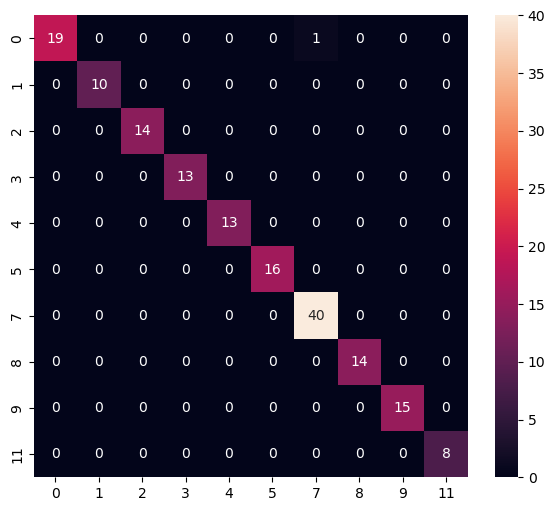

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        16
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         8

    accuracy                           0.99       163
   macro avg       1.00      0.99      1.00       163
weighted avg       0.99      0.99      0.99       163



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [19]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sures\AppData\Local\Temp\tmpuzve1j8b\assets


INFO:tensorflow:Assets written to: C:\Users\sures\AppData\Local\Temp\tmpuzve1j8b\assets


6940

# 推論テスト

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.53 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1415941e-04 7.3966095e-14 3.9967271e-15 1.5812384e-12 2.9064648e-05
 2.0005208e-04 4.5175387e-12 2.0191835e-02 1.2553982e-04 2.3669517e-03
 1.6974713e-14 9.7677237e-01 1.1999207e-11]
11
